# 계획
01.와인 품질(quailty:4,5,6..) 분류 예측

02.와인 종류(red:1, white:0) 분류 예측

03.와인 품질에 영향을 주는 변수들을 이용하여 좋은 와인이 되려면..?

# 목차 1

## 데이터

### 데이터 설명 
index 구분자
quality 품질
fixed acidity 산도
volatile acidity 휘발성산
citric acid 시트르산
residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
chlorides 염화물
free sulfur dioxide 독립 이산화황
total sulfur dioxide 총 이산화황
density 밀도
pH 수소이온농도
sulphates 황산염
alcohol 도수
type 종류

### 모듈 불러오기

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Github/study_01/wine_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Github/study_01/wine_data/test.csv')

In [ ]:
train.head()
# train 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 13개 변수를 가집니다.

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head()
# test 데이터의 개형을 살펴봅니다.
# index를 제외하면 총 12개 변수를 가집니다.
# train 중 quality 변수가 사라졌습니다.

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
train.info()
# train 데이터의 열 별 정보를 살펴봅니다. 
# 결측치(null)는 없습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


## 연습

### 특정열 선택, 삭제

In [ ]:
# 한개
train["alcohol"]
# 두개 이상
train[["alcohol","pH"]]

# 삭제
train = train.drop(["index"],axis=1)
train.head(5)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


### train 변수 간 상관관계
높은 상관관계를 갖는 변수: 

density(밀도)와 alcohol(도수)이 음의 상관관계 -0.69

density(밀도)와 residual sugar(잔당)이 양의 상관관계 0.56


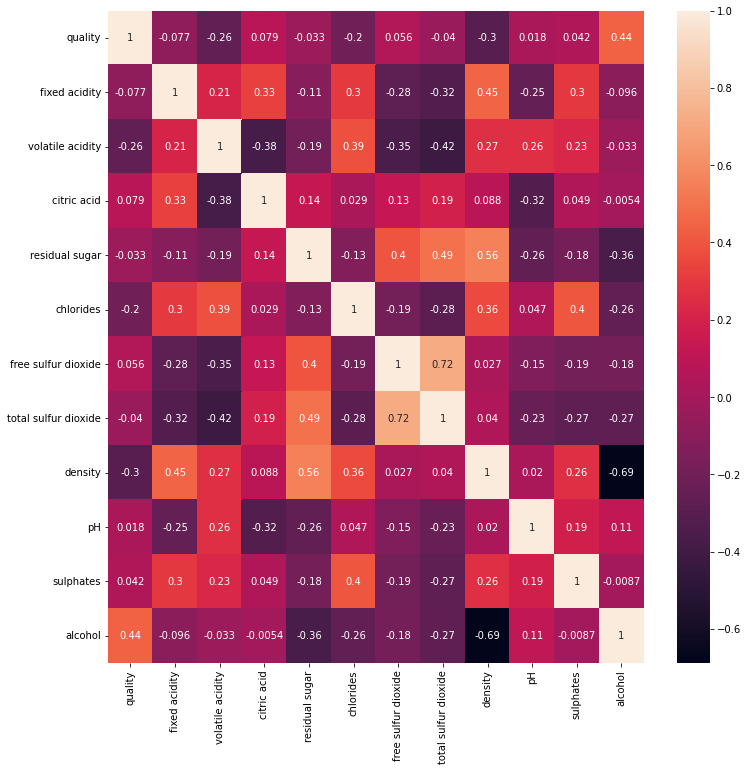

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True)

### train의 각 변수별 분포

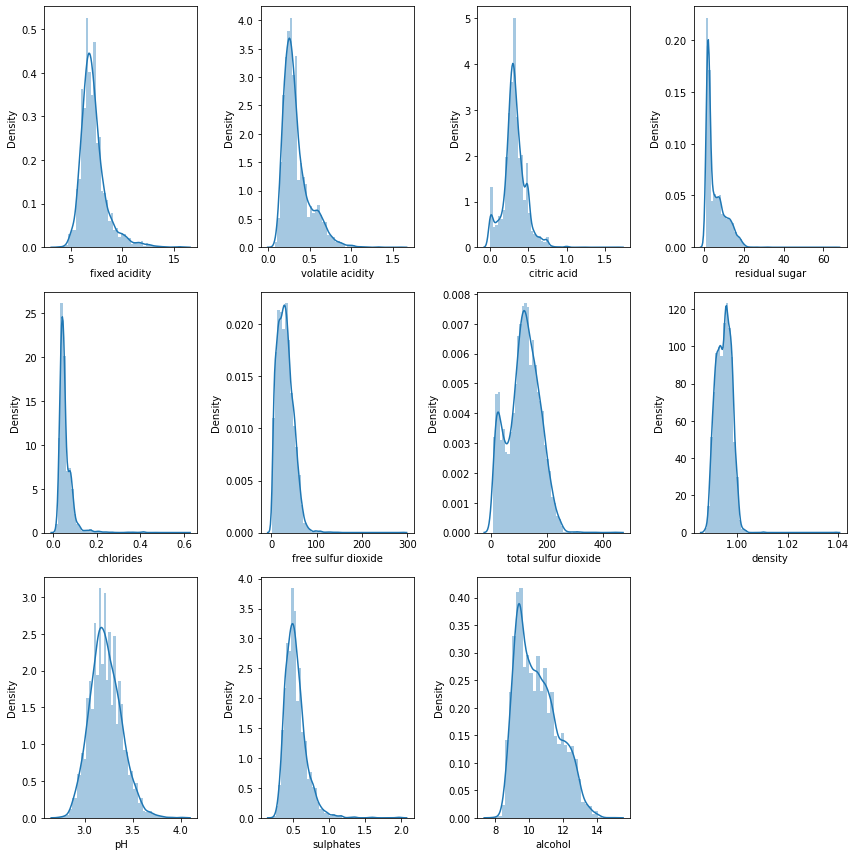

In [ ]:
plt.figure(figsize=(12,12))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

### train에서 각 변수와 quality 변수 사이 분포1

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


Text(0.5, 1.0, 'dist. of type')

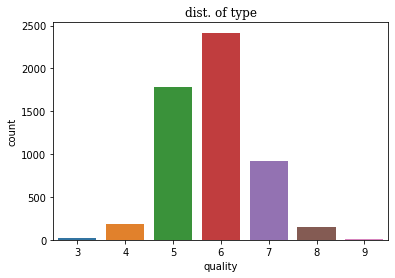

In [ ]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality'])
plt.title("dist. of type", fontfamily='serif',fontsize=12)
# 6등급 와인이 가장 많음

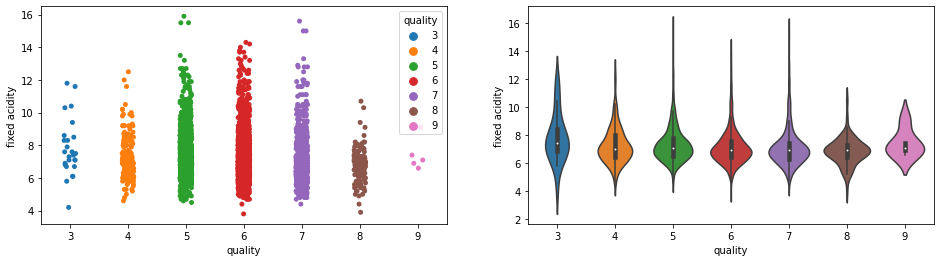

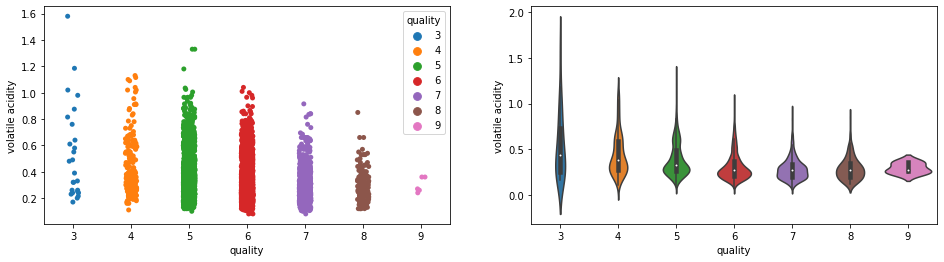

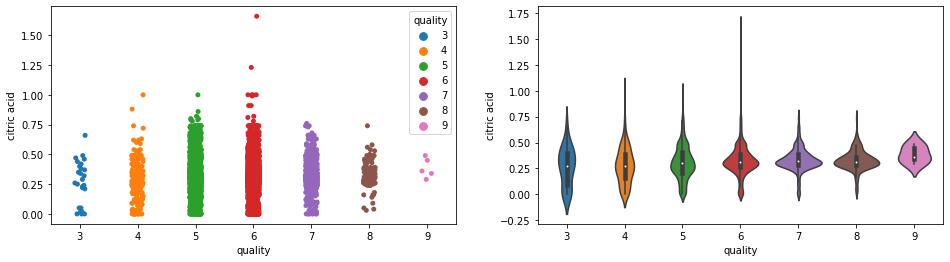

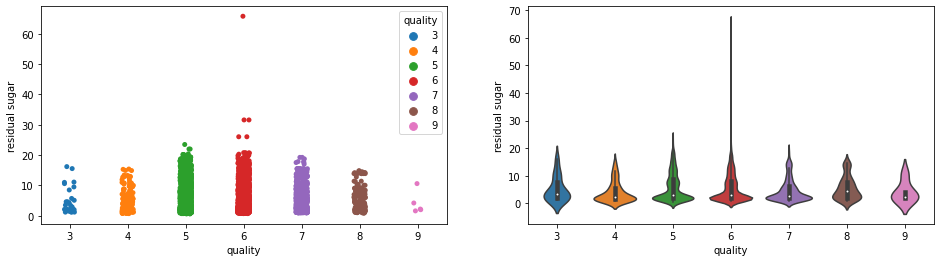

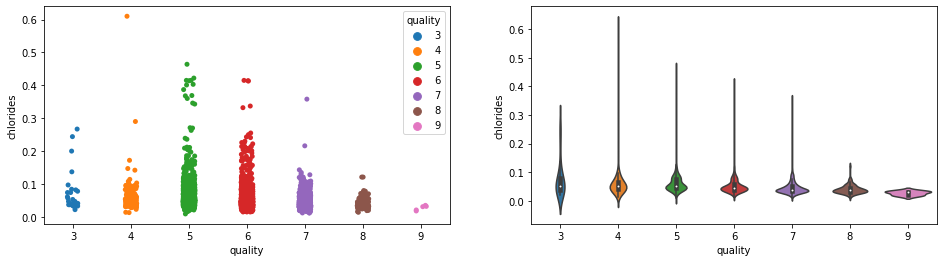

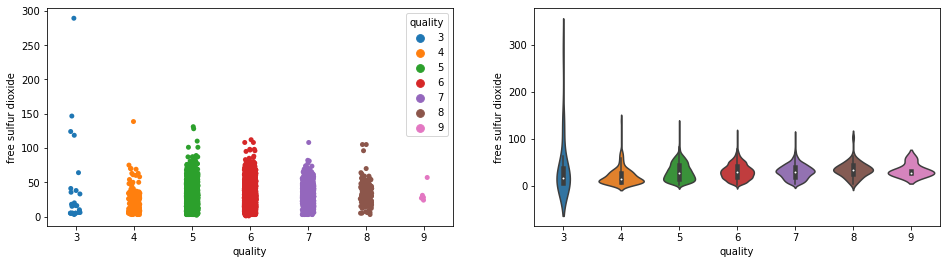

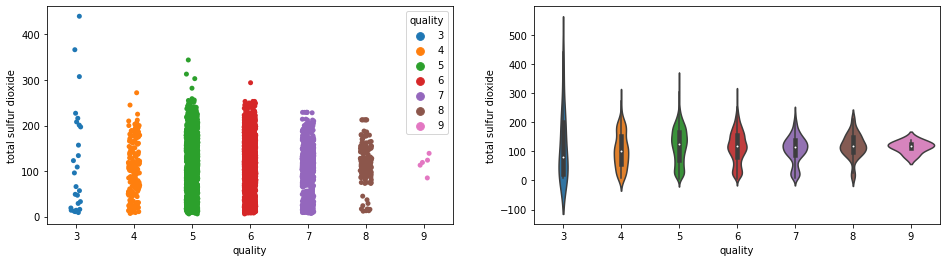

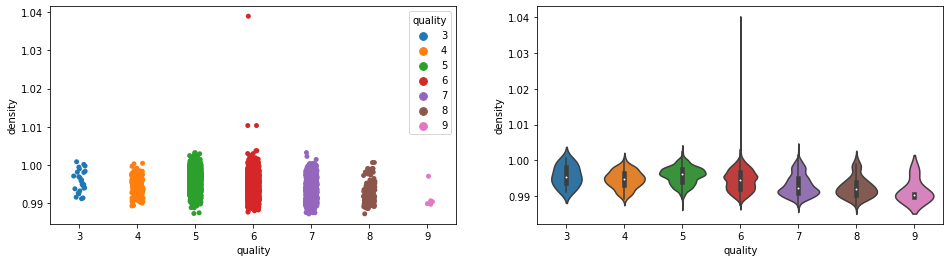

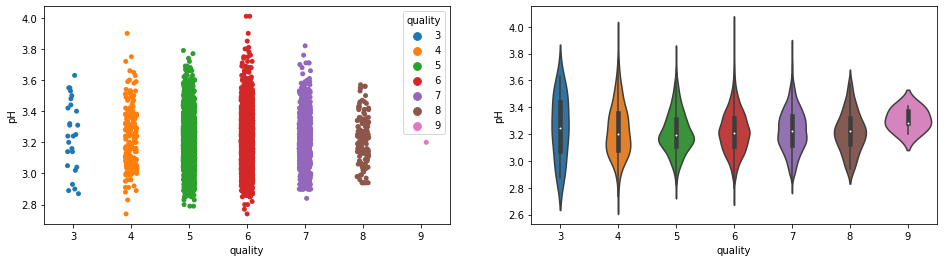

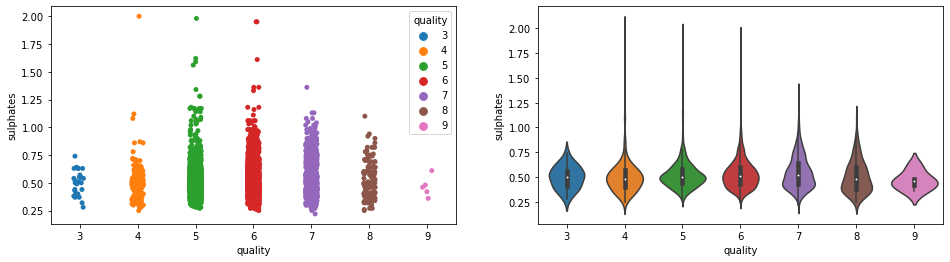

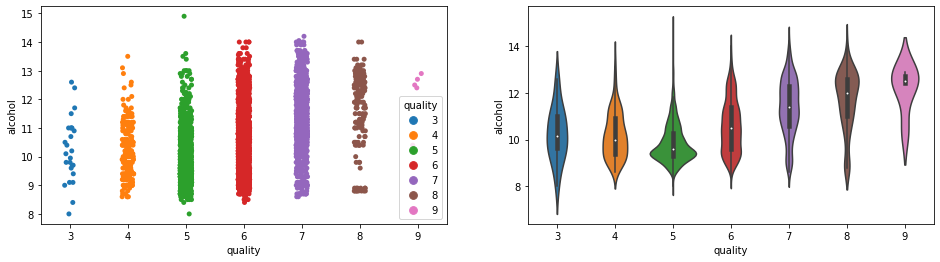

In [ ]:
numerical_columns = train.select_dtypes(exclude="object").columns.tolist()
numerical_columns.remove("quality") # quality 열 지우기
def show_dist_plot(df, columns):
  for column in columns:
    f, ax = plt.subplots(1,2,figsize=(16,4))
    sns.stripplot(x=df["quality"], y=df[column], ax=ax[0], hue=df["quality"])
    sns.violinplot(data=df, x="quality", y=column, ax=ax[1])

show_dist_plot(train, numerical_columns)

### train에서 각 변수와 quality 변수 사이 분포 2

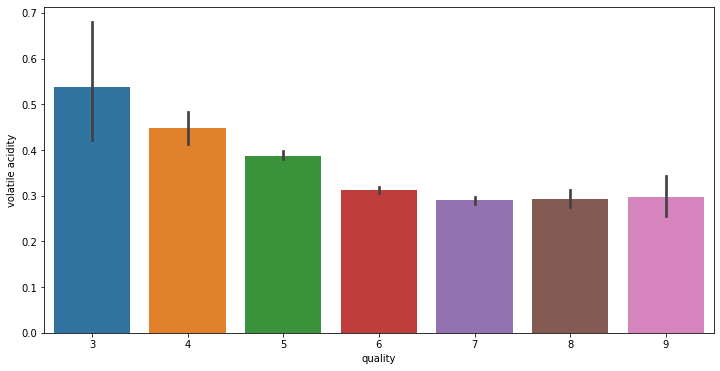

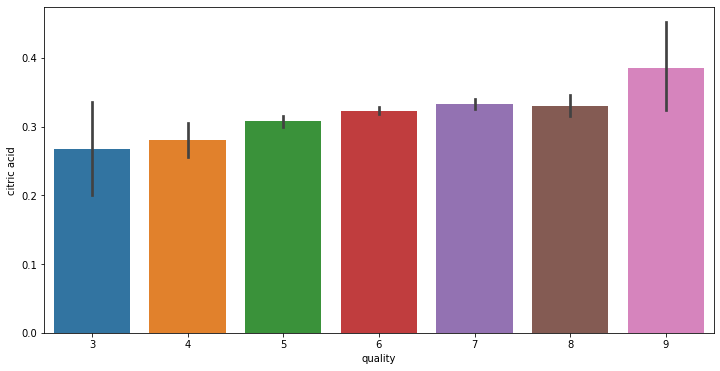

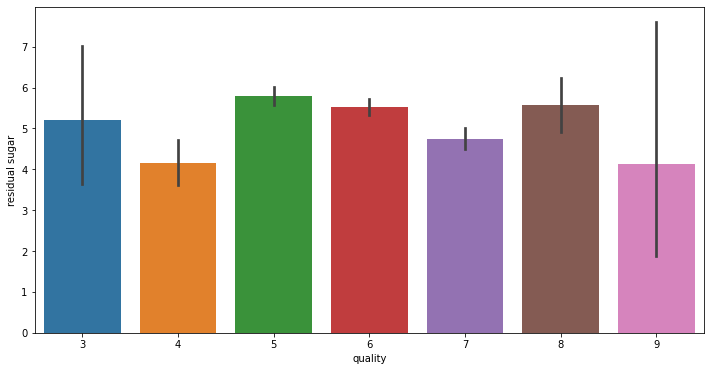

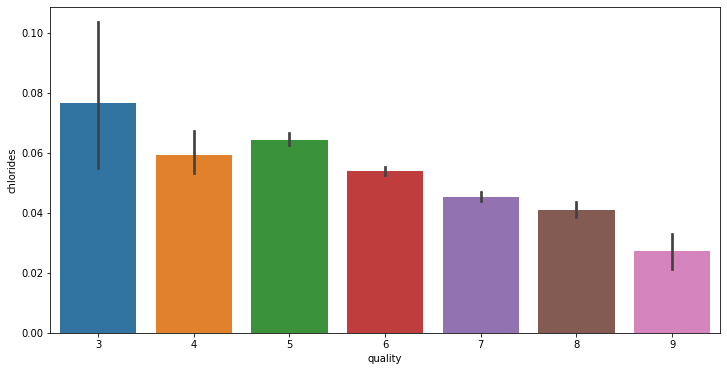

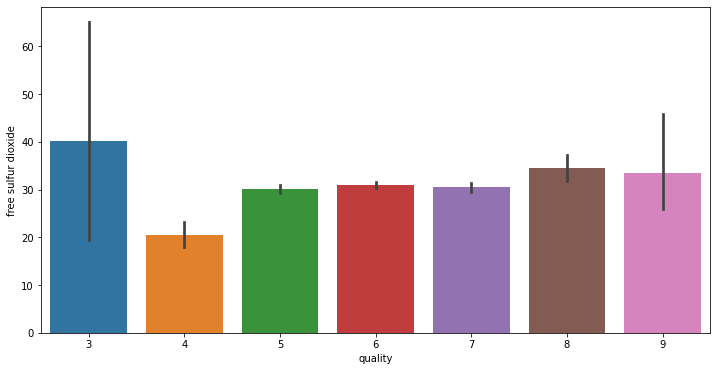

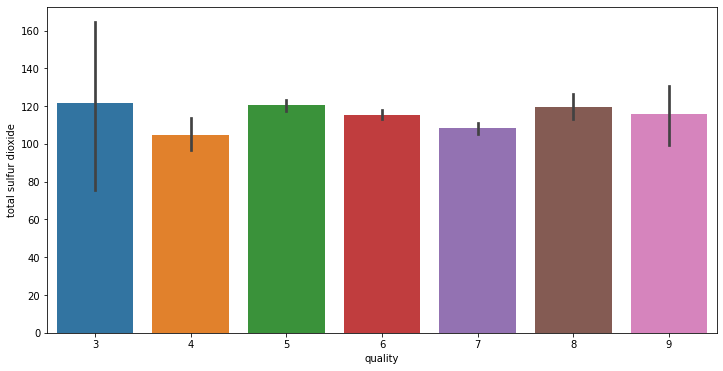

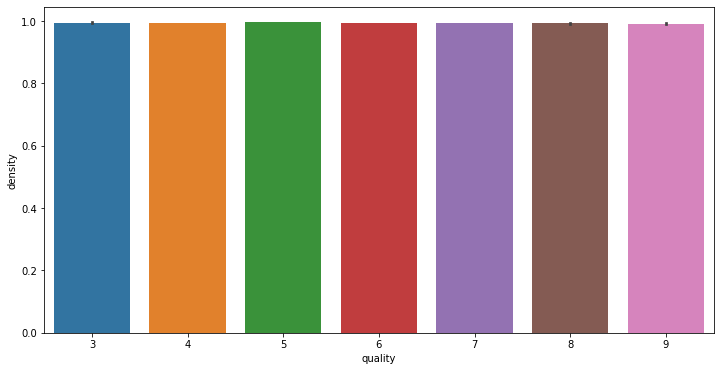

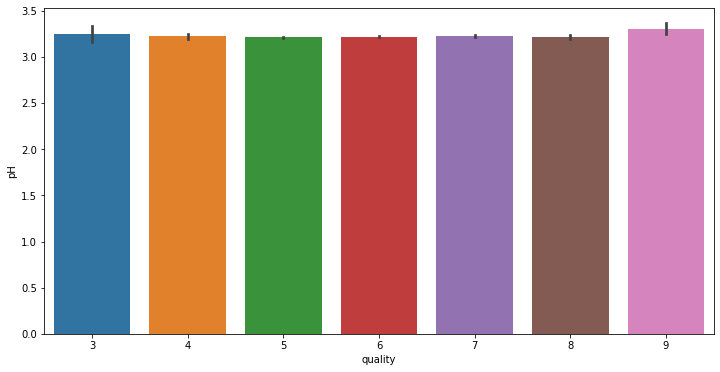

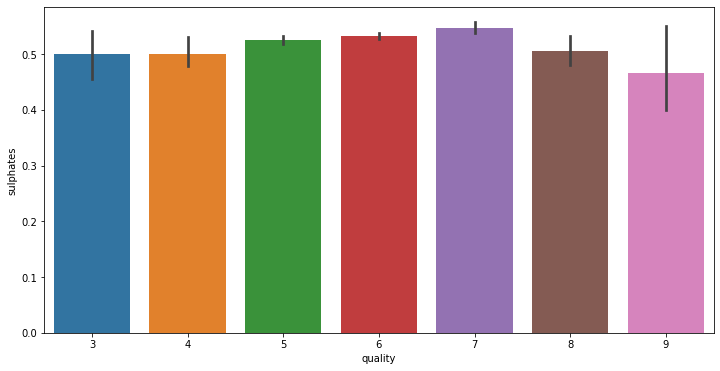

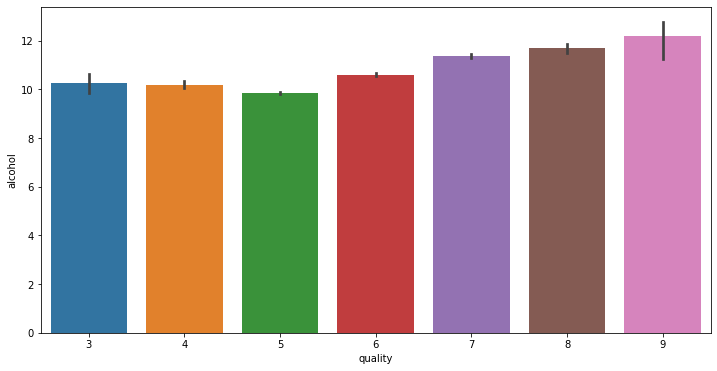

In [ ]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(10):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

In [ ]:
# 2번 방법이 더 직관적이게 잘 보이는 듯

### Comment
volatile acidity(휘발성산)이 높을수록 품질이 낮아지고
citric acid(시트르산)이 높을수록 품질이 높아진다.

chlorides(염화물)이 높을수록 품질이 낮아지고
alcohol(도수)이 높을수록 품질이 높아진다. 

나머지 변수는 크게 차이가 없거나 막대그래프로 확인하기 어렵다.


## 표준화

In [ ]:
#Library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import plot_roc_curve,accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
# 표준화
ss =StandardScaler()
train[numerical_columns] = ss.fit_transform(train[numerical_columns])

### type의 white와 red를 각각 0,1로 변환

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [ ]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,5,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,5,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1
3,6,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,1
4,6,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,1


In [ ]:
# 표준화 된 것을 확인

### 랜던포레스트란
의사결정나무의 과적합(Over Fitting)을 해결하기 위해 여러개의 의사결정트리를 취합하여 학습성능을 높이는 앙상블 모형이다.

<장점> 과적합 방지, 훈련시간 ↓, 정확도 ↑, 대규모 데이터베이스에도 적합

*지도학습: 훈련 데이터에 입력값과 목표값이 포함되고, 알고리즘은 입력값을 출력에 매핑하는 패턴으로 이 패턴을 사용하여 값을 예측한다.

## 랜덤포레스트 1 (와인 품질 분류 정확도 예측)

In [ ]:
X = train.drop(['quality'],axis=1)
y = train.quality

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=.2, random_state=42)

In [ ]:
# test size = 0.2 : train과 test를 8:2로 구분
# random_state : 42 같은 값으로 나오게 하기 위한 seed 설정

In [ ]:
train_x.shape, train_y.shape, test_x.shape

((4397, 12), (4397,), (1100, 12))

In [ ]:
def Model(model):
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    model_train_score= model.score(train_x, train_y)
    model_test_score=model.score(test_x, test_y)
    prediction = model.predict(test_x)
    cm = confusion_matrix(test_y, prediction)
    print("Testing Score\n", score)
    plot_confusion_matrix(model,test_x, test_y,cmap='OrRd')

Testing Score
 0.6845454545454546


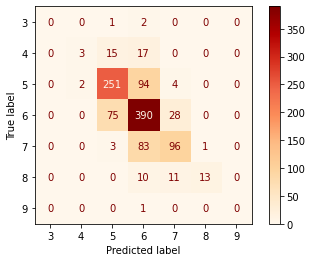

In [ ]:
#RandomForest
rf= RandomForestClassifier()
rf.fit(train_x,train_y)
Model(rf)

### Comment
주로 5-7등급을 예측하는데 실제 데이터도 5-7등급의 데이터가 많은것을 확인할 수 있다.

In [ ]:
train_x.shape, test.shape

((4397, 12), (1000, 13))

In [ ]:
# 삭제
test = test.drop(["index"],axis=1)

#Standardscaler
ss= StandardScaler()
test[numerical_columns] = ss.fit_transform(test[numerical_columns])

#factorize
test['type'] = pd.factorize(test['type'])[0]

test.head(3)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172,0
1,1,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025,1
2,2,-0.553583,-0.395042,-0.335387,-0.057012,-0.466520,0.709907,1.077835,-0.008456,-0.142782,1.063164,-0.864071,0


In [ ]:
final_pred = rf.predict(test)

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Github/study_01/wine_data/sample_submission.csv")

### submission 파일 생성

In [ ]:
#submission
submission['quality'] = final_pred
submission.to_csv("/content/drive/MyDrive/Github/study_01/wine_data/submission.csv",index=False)

## 독립변수의 중요도

### 1. 종속변수와의 상관관계

In [ ]:
train.corr().head(1)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
quality,1.0,-0.076506,-0.261557,0.079157,-0.032848,-0.198148,0.055574,-0.039732,-0.299831,0.017931,0.042068,0.439615,0.11828


In [ ]:
# quality 변수와 상관관계가 높은 변수 : alcohol(도수), density(밀도), volatile acidity(휘발성산) 등이 있다.

# 목차 2

## 로지스틱 회귀로 와인 분류하기

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head() # 처음 5개 행 확인
# 알코올 도수, 당도, ph
# 4번째 열이 target class (1: 화이트 와인, 0: 레드와인)

### info() : 데이터에 대한 설명

In [ ]:
wine.info()
# info() 의 활용: dataframe의 각 열에 missing이 존재하는지 확인하는데 유용

# 총 6497개의 샘플, 4개열 모두 실수값, non-null 값이 모두 6497이므로 missing 없음.
# missing이 있으면 imputation 방법에 대해 고민

### describe() : descriptive statistics(기술 통계량) 출력

In [ ]:
wine.describe()
# 평균, 표준편차, 사분위수 등 출력

In [ ]:
# 알코올, 당도, ph의 scale이 다름 -> 표준화 필요
# Numpy 배열로 변환 후 훈련/테스트 데이터 분리 필요

In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
target # 배열

### sklearn 에서의 train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)
# default test set size : 25%, 샘플 개수가 많으니 test set은 20%만 할당

In [ ]:
# 훈련/테스트 데이터 크기 확인
print(train_input.shape, test_input.shape)
# 훈련 : 5,197개, 테스트 : 1,300개

### StandardScaler을 통해 표준화

In [ ]:
# StandardScaler 클래스 이용하여 훈련세트 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) # 같은 객체를 그대로 사용하여 test set standardization

### 로지스틱 회귀

In [ ]:
# training w/ logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

In [ ]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


### Comment1
점수가 높지 않음. 로지스틱 모형 구성이 어려움.

훈련/테스트 모두 점수가 낮으니 과소적합 의심

규제 매개변수 C값을 바꿀까? 다른 알고리즘을 선택할까?

In [ ]:
# 로지스틱 회귀계수 출력
print(lr.coef_, lr.intercept_)

# 0.5127*(알콜도수) + 1.6734*(당도) -0.6877*(pH) +1.8178


### Comment2
회귀계수에 대한 설명이 어려움.

알콜도수가 높을수록 화이트와인(1)일 가능성이 높고, pH가 높을수록 레드와인(0)일 가능성이 높음.

숫자의 의미를 설명하기 어려움. 특성이 추가될수록 더욱 어려움.

회귀모형이 때로는 설명력을 떨어뜨림 -> 직관적 순서도가 이해하는데 쉬울 수 있음.

## 의사결정나무